In [116]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [117]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import yfinance as yf

In [119]:
apple = yf.Ticker("AAPL")

In [120]:
apple = apple.history(period="max")


In [121]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099874,0.100308,0.099874,0.099874,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.095098,0.095098,0.094663,0.094663,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088149,0.088149,0.087715,0.087715,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089886,0.090321,0.089886,0.089886,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092492,0.092927,0.092492,0.092492,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,130.470001,133.410004,129.889999,130.149994,70790800,0.0,0.0
2023-01-10 00:00:00-05:00,130.259995,131.259995,128.119995,130.729996,63896200,0.0,0.0
2023-01-11 00:00:00-05:00,131.250000,133.509995,130.460007,133.490005,69458900,0.0,0.0


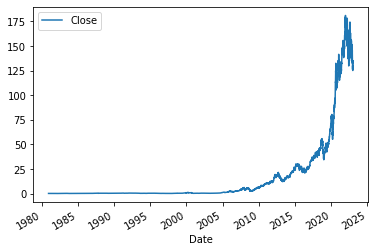

In [122]:
apple.plot.line(y='Close', use_index=True)

In [123]:
del apple["Dividends"]
del apple["Stock Splits"]

In [124]:
apple["Tomorrow"] = apple["Close"].shift(-1)

In [125]:
apple

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099874,0.100308,0.099874,0.099874,469033600,0.094663
1980-12-15 00:00:00-05:00,0.095098,0.095098,0.094663,0.094663,175884800,0.087715
1980-12-16 00:00:00-05:00,0.088149,0.088149,0.087715,0.087715,105728000,0.089886
1980-12-17 00:00:00-05:00,0.089886,0.090321,0.089886,0.089886,86441600,0.092492
1980-12-18 00:00:00-05:00,0.092492,0.092927,0.092492,0.092492,73449600,0.098137
...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,130.470001,133.410004,129.889999,130.149994,70790800,130.729996
2023-01-10 00:00:00-05:00,130.259995,131.259995,128.119995,130.729996,63896200,133.490005
2023-01-11 00:00:00-05:00,131.250000,133.509995,130.460007,133.490005,69458900,133.410004


In [126]:
apple["Target"] = (apple["Tomorrow"] > apple["Close"]).astype(int)

In [127]:
apple

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099874,0.100308,0.099874,0.099874,469033600,0.094663,0
1980-12-15 00:00:00-05:00,0.095098,0.095098,0.094663,0.094663,175884800,0.087715,0
1980-12-16 00:00:00-05:00,0.088149,0.088149,0.087715,0.087715,105728000,0.089886,1
1980-12-17 00:00:00-05:00,0.089886,0.090321,0.089886,0.089886,86441600,0.092492,1
1980-12-18 00:00:00-05:00,0.092492,0.092927,0.092492,0.092492,73449600,0.098137,1
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,130.470001,133.410004,129.889999,130.149994,70790800,130.729996,1
2023-01-10 00:00:00-05:00,130.259995,131.259995,128.119995,130.729996,63896200,133.490005,1
2023-01-11 00:00:00-05:00,131.250000,133.509995,130.460007,133.490005,69458900,133.410004,0


In [128]:
apple = apple.loc["1990-01-01":].copy()

In [129]:
apple

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.250664,0.266663,0.248886,0.264886,183198400,0.266664,1
1990-01-03 00:00:00-05:00,0.270220,0.270220,0.266664,0.266664,207995200,0.267553,1
1990-01-04 00:00:00-05:00,0.271997,0.275553,0.264886,0.267553,221513600,0.268442,1
1990-01-05 00:00:00-05:00,0.268442,0.271997,0.263108,0.268442,123312000,0.270220,1
1990-01-08 00:00:00-05:00,0.266664,0.270220,0.263108,0.270220,101572800,0.267553,0
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,130.470001,133.410004,129.889999,130.149994,70790800,130.729996,1
2023-01-10 00:00:00-05:00,130.259995,131.259995,128.119995,130.729996,63896200,133.490005,1
2023-01-11 00:00:00-05:00,131.250000,133.509995,130.460007,133.490005,69458900,133.410004,0


In [130]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

train = apple.iloc[:-100]
test = apple.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [131]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [132]:
import pandas as pd
preds = pd.Series(preds, index = test.index)

In [133]:
precision_score(test["Target"], preds)

0.4868421052631579

In [134]:
combined = pd.concat([test["Target"], preds], axis = 1)

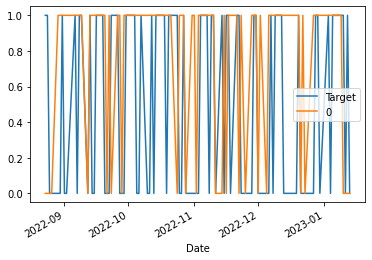

In [135]:
combined.plot()

In [136]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [137]:
def backtest(data, model, predictors, start = 2500, step = 250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i + step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)

In [138]:
predictions = backtest(apple, model, predictors)

In [139]:
predictions["Predictions"].value_counts()

0    3990
1    1834
Name: Predictions, dtype: int64

In [140]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5174482006543075

In [141]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.520261
0    0.479739
Name: Target, dtype: float64

In [143]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = apple.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  apple[ratio_column] = apple["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  apple[trend_column] = apple.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]


In [145]:
apple = apple.dropna()

In [148]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [149]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [150]:
predictions = backtest(apple, model, new_predictors)

In [151]:
predictions["Predictions"].value_counts()

0.0    4318
1.0     505
Name: Predictions, dtype: int64

In [152]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5366336633663367